In [1]:
from __future__ import absolute_import, division, print_function

from inspect import getsourcefile
import os.path
import sys

In [2]:
sys.path.insert(0, "C:/Users/fuchsto/Workspaces/Menlo Systems/opmodaq.git/opmodaq/")
import opmodaq.modes
import opmodaq.parameters as params
import opmodaq.generators as gen
import opmodaq.devices.plot as plotdev
sys.path.pop(0)

import math
import time
import tkinter as tk

import matplotlib.pyplot as plt

In [3]:
sample_rate_hz      =  5000 # Hz
n_per_channel       = 10000 # sample buffer size per channel

osc_sine = gen.Sine(freq   = 4.5,
                    signal = params.Signal(
                                 signal_range = { -2.0, +2.0 },
                                 offset       = 0.0))
osc_saw  = gen.Saw(freq   = 2.5,
                   signal = params.Signal(
                                  signal_range = { -1.0, +1.0 },
                                  offset       = -0.5))

signals  = []
signals.append(osc_sine)
signals.append(osc_saw)

plot_dev = plotdev.PlotDevice(
                params.Sampling(
                    frequency    = sample_rate_hz,
                    sample_range = { 0, 255 }))

analog_out_channels: list = []
analog_out_channels.append(plot_dev.channel(0))
analog_out_channels.append(plot_dev.channel(1))


NameError: name 'mcc_daq' is not defined

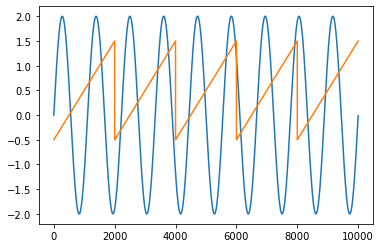

In [4]:
for channel in analog_out_channels:
    channel.analog_out(generator    = signals[channel.channel_idx],
                       sample_range = range(n_per_channel))

In [5]:
# Simplistic profiling of sample generation:
s_buffer      = n_per_channel / sample_rate_hz
sample_range  = range(n_per_channel)
sample_data   = []

t_start       = time.time_ns()
for channel in analog_out_channels:
    channel_samples = []
    generator       = signals[channel.channel_idx]
    for y in generator.samples(channel.device.sampling, sample_range):
        channel_samples.append(y)
    sample_data.append(channel_samples)
t_elapsed = (time.time_ns() - t_start) / 1e6

print(f'{n_per_channel} samples (= {s_buffer} s)',
      f'in {len(analog_out_channels)} channels',
      f'in {t_elapsed / 1000} s')

10000 samples (= 2.0 s) in 2 channels in 0.019041899999999997 s
